Naive Bayes (One vs One) + LSI

classification report:
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.74      0.78      0.76       392
   comp.sys.mac.hardware       0.74      0.73      0.74       385
            misc.forsale       0.84      0.77      0.80       390
  soc.religion.christian       0.93      0.97      0.95       398

             avg / total       0.81      0.81      0.81      1565


The confusion matrix is:
[[305  58  23   6]
 [ 67 281  26  11]
 [ 39  38 301  12]
 [  0   1  10 387]]



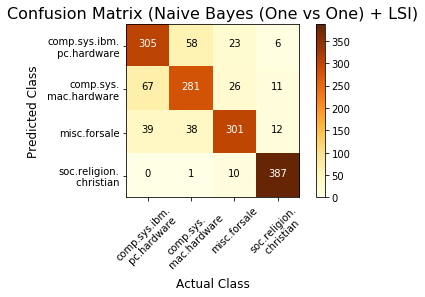

The total accuracy is:
0.8140575079872204



Naive Bayes (One vs One) + NMF

classification report:
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.64      0.73      0.68       392
   comp.sys.mac.hardware       0.70      0.69      0.70       385
            misc.forsale       0.81      0.69      0.75       390
  soc.religion.christian       0.97      0.98      0.97       398

             avg / total       0.78      0.78      0.78      1565


The confusion matrix is:
[[288  71  31   2]
 [ 89 267  29   0]
 [ 71  38 270  11]
 [  2   4   2 390]]



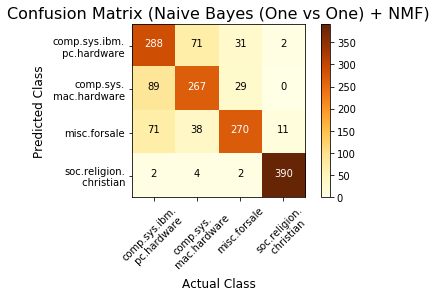

The total accuracy is:
0.7763578274760383



SVM (One vs One) + LSI

classification report:
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.87      0.88      0.87       392
   comp.sys.mac.hardware       0.87      0.85      0.86       385
            misc.forsale       0.88      0.89      0.89       390
  soc.religion.christian       1.00      0.98      0.99       398

             avg / total       0.90      0.90      0.90      1565


The confusion matrix is:
[[345  30  17   0]
 [ 26 329  30   0]
 [ 23  19 348   0]
 [  4   1   1 392]]



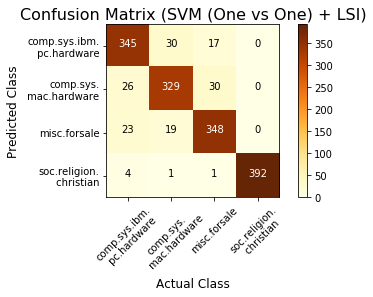

The total accuracy is:
0.9035143769968051



SVM (One vs One) + NMF

classification report:
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.76      0.83      0.79       392
   comp.sys.mac.hardware       0.85      0.75      0.80       385
            misc.forsale       0.77      0.84      0.80       390
  soc.religion.christian       0.99      0.93      0.96       398

             avg / total       0.84      0.84      0.84      1565


The confusion matrix is:
[[325  30  37   0]
 [ 57 289  38   1]
 [ 44  17 327   2]
 [  1   3  25 369]]



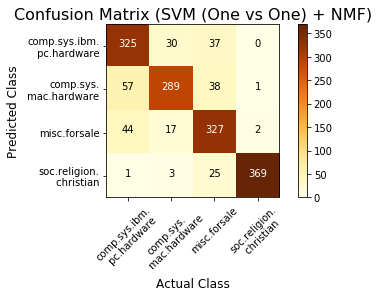

The total accuracy is:
0.8370607028753994



Naive Bayes (One vs Rest) + LSI

classification report:
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.74      0.77      0.75       392
   comp.sys.mac.hardware       0.72      0.70      0.71       385
            misc.forsale       0.84      0.76      0.80       390
  soc.religion.christian       0.92      0.98      0.95       398

             avg / total       0.80      0.81      0.80      1565


The confusion matrix is:
[[301  60  24   7]
 [ 70 271  30  14]
 [ 38  42 298  12]
 [  0   3   4 391]]



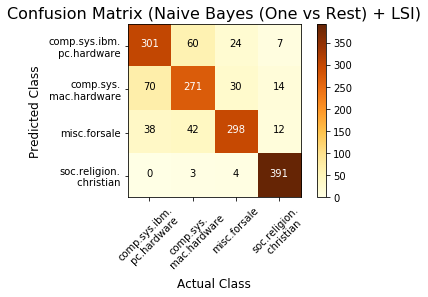

The total accuracy is:
0.8057507987220447



Naive Bayes (One vs Rest) + NMF

classification report:
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.67      0.74      0.70       392
   comp.sys.mac.hardware       0.74      0.70      0.72       385
            misc.forsale       0.80      0.74      0.77       390
  soc.religion.christian       0.96      0.98      0.97       398

             avg / total       0.79      0.79      0.79      1565


The confusion matrix is:
[[290  68  32   2]
 [ 75 271  35   4]
 [ 66  23 290  11]
 [  2   3   4 389]]



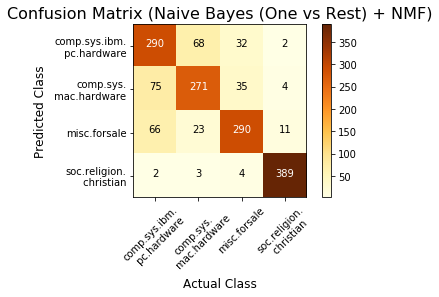

The total accuracy is:
0.792332268370607



SVM, (One vs Rest) + LSI

classification report:
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.88      0.86      0.87       392
   comp.sys.mac.hardware       0.86      0.85      0.86       385
            misc.forsale       0.88      0.91      0.89       390
  soc.religion.christian       0.98      0.98      0.98       398

             avg / total       0.90      0.90      0.90      1565


The confusion matrix is:
[[337  34  18   3]
 [ 24 329  30   2]
 [ 18  18 353   1]
 [  3   1   2 392]]



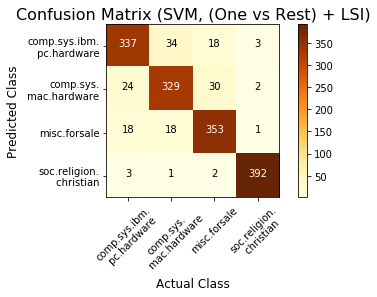

The total accuracy is:
0.9015974440894569



SVM, (One vs Rest) + NMF

classification report:
                          precision    recall  f1-score   support

comp.sys.ibm.pc.hardware       0.78      0.84      0.81       392
   comp.sys.mac.hardware       0.87      0.76      0.81       385
            misc.forsale       0.81      0.85      0.83       390
  soc.religion.christian       0.98      0.97      0.97       398

             avg / total       0.86      0.86      0.86      1565


The confusion matrix is:
[[329  25  34   4]
 [ 55 292  35   3]
 [ 40  16 332   2]
 [  0   2   9 387]]



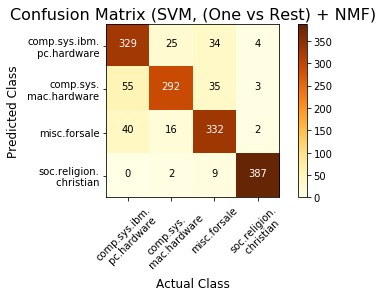

The total accuracy is:
0.8562300319488818





In [5]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
import re
from sklearn import svm
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk import SnowballStemmer
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


# fetch original data
def load_dataset(category_list):
    train = fetch_20newsgroups(subset='train',  shuffle=True, random_state=42, categories=category_list)
    test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, categories=category_list)
    
    return train, test

category = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']
training_data, testing_data = load_dataset(category)    
all_data = training_data.data+testing_data.data


# trim data
stemmer = SnowballStemmer("english")
def trim_and_stem(data_list):
    for i in range(len(data_list)):
        temp = re.findall('[a-zA-Z]+', data_list[i])
        ans = []
        for j in range(len(temp)):
            if not temp[j].isdigit():
                ans.append(stemmer.stem(temp[j])) # stem() turned words into lowercase            
        data_list[i] = " ".join(ans)
trim_and_stem(all_data)


# generate count matrices with min_df = 2
X_counts = []
count_vect = CountVectorizer(min_df=2, stop_words ='english')
X_counts.append(count_vect.fit_transform(all_data))


# generate tfidf matrices 
tfidf_transformer = TfidfTransformer(norm='l2', sublinear_tf=True)
X_tfidf = []
X_tfidf.append(tfidf_transformer.fit_transform(X_counts[0]))


# extract feature using LSI & NMF
lsi_res = []
svd = TruncatedSVD(n_components = 50, n_iter = 10,random_state = 42)
lsi_res.append(svd.fit_transform(X_tfidf[0]))
nmf = NMF(n_components=50, init='random', random_state=0)
nmf_res = nmf.fit_transform(X_tfidf[0])


# split train and test dataset
lsi_train = lsi_res[0][0:len(training_data.data)]
lsi_test = lsi_res[0][len(training_data.data):]
nmf_train = nmf_res[0:len(training_data.data)]
nmf_test = nmf_res[len(training_data.data):]
train = []
train.append(lsi_train)
train.append(nmf_train)
test = []
test.append(lsi_test)
test.append(nmf_test)

method = ['LSI', 'NMF']
    
clf_list = [OneVsOneClassifier(GaussianNB()), OneVsOneClassifier(svm.LinearSVC()), OneVsRestClassifier(GaussianNB()), OneVsRestClassifier(svm.LinearSVC())]
clf_name = ['Naive Bayes (One vs One)', 'SVM (One vs One)','Naive Bayes (One vs Rest)', 'SVM, (One vs Rest)']

# plot confusion matrix
class_names = ['comp.sys.ibm.\n pc.hardware', 'comp.sys.\n mac.hardware', 'misc.forsale', 'soc.religion.\n christian']
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.YlOrBr):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted Class', fontsize=12)
    plt.xlabel('Actual Class', fontsize=12)
    

# perform classification
for clf,clf_n in zip(clf_list,clf_name):
    for i in [0, 1]:
        print clf_n +' + '+ str(method[i])
        clf.fit(train[i], training_data.target)
        test_predicted = clf.predict(test[i])
        print '\nclassification report:'
        print '=================================================================='
        print metrics.classification_report(testing_data.target, test_predicted, target_names=['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian'])
        print '==================================================================\n'
        print 'The confusion matrix is:'
        conf_mat = metrics.confusion_matrix(testing_data.target, test_predicted) 
        print '===================='
        print conf_mat 
        print '====================\n'
        # Plot non-normalized confusion matrix
        plt.figure()
        title = 'Confusion Matrix ('+clf_n+' + '+str(method[i])+')'
        plot_confusion_matrix(conf_mat, classes=class_names, title=title)
        plt.show()
        print 'The total accuracy is:'
        print np.mean(testing_data.target == test_predicted)
        print '\n\n'